In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train=pd.read_excel(r"C:\Users\Rupali\Downloads\archive (1)\Data_Train.xlsx")

In [3]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df_train.shape

(10683, 11)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df_test=pd.read_excel(r"C:\Users\Rupali\Downloads\archive (1)\Test_set.xlsx")

In [8]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [9]:
df=df_train.append(df_test)

C:\Users\Rupali\AppData\Local\Temp\ipykernel_14760\3238464827.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df_train.append(df_test)


In [10]:
df.shape

(13354, 11)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [12]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [13]:
df['Date_of_Journey'].str.split('/').str[0]

0       24
1        1
2        9
3       12
4       01
        ..
2666     6
2667    27
2668     6
2669     6
2670    15
Name: Date_of_Journey, Length: 13354, dtype: object

In [14]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [15]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [16]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [17]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [18]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [19]:
df.head(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [20]:
df['Arrival_Time'].str.split(' ').str[0]

0       01:10
1       13:15
2       04:25
3       23:30
4       21:35
        ...  
2666    20:25
2667    16:55
2668    04:25
2669    19:15
2670    19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [21]:
df['Arrival_Time']=df['Arrival_Time'].apply(lambda x : x.split(' ')[0])

In [22]:
df['Arrival_hour']=df['Arrival_Time'].str.split(':').str[0]
df['Arrival_min']=df['Arrival_Time'].str.split(':').str[1]

In [23]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,03,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019,13,15


In [24]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [25]:
df.head(5)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,03,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,05,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,06,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,05,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,01,03,2019,21,35


In [33]:
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int32  
 9   Month            13354 non-null  int32  
 10  Year             13354 non-null  int32  
 11  Arrival_hour     13354 non-null  object 
 12  Arrival_min      13354 non-null  object 
 13  Dept_hour        13354 non-null  int32  
 14  Dept_min         13354 non-null  int32  
dtypes: float64(1), int32(5), object(9)
memory usage: 1.4+ MB


In [34]:
df['Arrival_hour']=df['Arrival_hour'].astype(int)
df['Arrival_min']=df['Arrival_min'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int32  
 9   Month            13354 non-null  int32  
 10  Year             13354 non-null  int32  
 11  Arrival_hour     13354 non-null  int32  
 12  Arrival_min      13354 non-null  int32  
 13  Dept_hour        13354 non-null  int32  
 14  Dept_min         13354 non-null  int32  
dtypes: float64(1), int32(7), object(7)
memory usage: 1.3+ MB


In [26]:
df['Dept_hour']=df['Dep_Time'].str.split(':').str[0]
df['Dept_min']=df['Dep_Time'].str.split(':').str[1]

In [27]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,03,2019,01,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,05,2019,13,15,05,50


In [35]:
df['Dept_hour']=df['Dept_hour'].astype(int)
df['Dept_min']=df['Dept_min'].astype(int)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int32  
 9   Month            13354 non-null  int32  
 10  Year             13354 non-null  int32  
 11  Arrival_hour     13354 non-null  int32  
 12  Arrival_min      13354 non-null  int32  
 13  Dept_hour        13354 non-null  int32  
 14  Dept_min         13354 non-null  int32  
dtypes: float64(1), int32(7), object(7)
memory usage: 1.3+ MB


In [31]:
df.drop('Dep_Time',axis=1,inplace=True)

In [32]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,03,2019,01,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,05,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,06,2019,04,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,05,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,01,03,2019,21,35,16,50


In [37]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [38]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3,'nan':1, '4 stops':4})

In [39]:
df[df['Total_Stops'].isnull()]


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480.0,6,5,2019,9,25,9,45


In [40]:
df.drop('Route',axis=1,inplace=True)

In [41]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [42]:
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [44]:
df['duration_hour']=df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df[df['duration_hour']=='5m']


,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour
6474,Air India,Mumbai,Hyderabad,5m,2.0,No info,17327.0,6,3,2019,16,55,16,50,5m
2660,Air India,Mumbai,Hyderabad,5m,2.0,No info,NaN,12,3,2019,16,55,16,50,5m


In [46]:
df.drop(5039,axis=0,inplace=True)
df.drop(6474,axis=0,inplace=True)
df.drop(2660,axis=0,inplace=True)


In [47]:
df.shape

(13350, 15)

In [48]:
df['duration_hour']=df['duration_hour'].astype('int')

In [49]:
df.drop('Duration',axis=1,inplace=True)

In [50]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,2.0,No info,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,2.0,No info,13882.0,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,1.0,No info,6218.0,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,1.0,No info,13302.0,1,3,2019,21,35,16,50,4


In [52]:
df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [53]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()


In [55]:
df['Airline']=labelencoder.fit_transform(df['Airline'])
df['Source']=labelencoder.fit_transform(df['Source'])
df['Destination']=labelencoder.fit_transform(df['Destination'])
df['Additional_Info']=labelencoder.fit_transform(df['Additional_Info'])

In [57]:
df.shape

(13350, 14)

In [59]:
df.head(10)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour
0,3,0,5,0.0,8,3897.0,24,3,2019,1,10,22,20,2
1,1,3,0,2.0,8,7662.0,1,5,2019,13,15,5,50,7
2,4,2,1,2.0,8,13882.0,9,6,2019,4,25,9,25,19
3,3,3,0,1.0,8,6218.0,12,5,2019,23,30,18,5,5
4,3,0,5,1.0,8,13302.0,1,3,2019,21,35,16,50,4
5,8,3,0,0.0,8,3873.0,24,6,2019,11,25,9,0,2
6,4,0,5,1.0,5,11087.0,12,3,2019,10,25,18,55,15
7,4,0,5,1.0,8,22270.0,1,3,2019,5,5,8,0,21
8,4,0,5,1.0,5,11087.0,12,3,2019,10,25,8,55,25
9,6,2,1,1.0,8,8625.0,27,5,2019,19,15,11,25,7


In [63]:
df[['Airline']]

,Airline
0,3
1,1
2,4
3,3
4,3
...,...
2666,1
2667,3
2668,4
2669,1


In [65]:
labelencoder.fit_transform(np.array(df['Airline']).reshape(-1,1))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([3, 1, 4, ..., 4, 1, 6], dtype=int64)

In [66]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour
0,3,0,5,0.0,8,3897.0,24,3,2019,1,10,22,20,2
1,1,3,0,2.0,8,7662.0,1,5,2019,13,15,5,50,7
2,4,2,1,2.0,8,13882.0,9,6,2019,4,25,9,25,19
3,3,3,0,1.0,8,6218.0,12,5,2019,23,30,18,5,5
4,3,0,5,1.0,8,13302.0,1,3,2019,21,35,16,50,4


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13350 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13350 non-null  int64  
 1   Source           13350 non-null  int64  
 2   Destination      13350 non-null  int64  
 3   Total_Stops      13349 non-null  float64
 4   Additional_Info  13350 non-null  int64  
 5   Price            10680 non-null  float64
 6   Date             13350 non-null  int32  
 7   Month            13350 non-null  int32  
 8   Year             13350 non-null  int32  
 9   Arrival_hour     13350 non-null  int32  
 10  Arrival_min      13350 non-null  int32  
 11  Dept_hour        13350 non-null  int32  
 12  Dept_min         13350 non-null  int32  
 13  duration_hour    13350 non-null  int32  
dtypes: float64(2), int32(8), int64(4)
memory usage: 1.1 MB


In [69]:
df1=pd.get_dummies(df,columns=["Airline", "Source", "Destination"] ,drop_first = True)


In [74]:
df1.head()

,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,...,Airline_11,Source_1,Source_2,Source_3,Source_4,Destination_1,Destination_2,Destination_3,Destination_4,Destination_5
0,0.0,8,3897.0,24,3,2019,1,10,22,20,...,0,0,0,0,0,0,0,0,0,1
1,2.0,8,7662.0,1,5,2019,13,15,5,50,...,0,0,0,1,0,0,0,0,0,0
2,2.0,8,13882.0,9,6,2019,4,25,9,25,...,0,0,1,0,0,1,0,0,0,0
3,1.0,8,6218.0,12,5,2019,23,30,18,5,...,0,0,0,1,0,0,0,0,0,0
4,1.0,8,13302.0,1,3,2019,21,35,16,50,...,0,0,0,0,0,0,0,0,0,1


In [72]:
df1.describe()

,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,...,Airline_11,Source_1,Source_2,Source_3,Source_4,Destination_1,Destination_2,Destination_3,Destination_4,Destination_5
count,13349.000000,13350.000000,10680.000000,13350.000000,13350.000000,13350.0,13350.000000,13350.000000,13350.000000,13350.000000,...,13350.000000,13350.000000,13350.000000,13350.00000,13350.000000,13350.000000,13350.000000,13350.000000,13350.000000,13350.000000
mean,0.825755,7.407790,9085.788858,13.389588,4.710637,2019.0,13.395356,24.660674,12.512285,24.500749,...,0.000375,0.034157,0.425468,0.26824,0.065993,0.425468,0.118502,0.065993,0.034157,0.087640
std,0.674502,1.198358,4611.123786,8.439243,1.165501,0.0,6.896924,16.556423,5.736305,18.831108,...,0.019350,0.181640,0.494432,0.44306,0.248278,0.494432,0.323214,0.248278,0.181640,0.282782
min,0.000000,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,10.000000,8.000000,5.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,8.000000,8372.000000,12.000000,5.000000,2019.0,14.000000,25.000000,11.000000,25.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,8.000000,12373.000000,21.000000,6.000000,2019.0,19.000000,35.000000,18.000000,40.000000,...,0.000000,0.000000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,9.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
df1.isnull().sum()

Total_Stops           1
Additional_Info       0
Price              2670
Date                  0
Month                 0
Year                  0
Arrival_hour          0
Arrival_min           0
Dept_hour             0
Dept_min              0
duration_hour         0
Airline_1             0
Airline_2             0
Airline_3             0
Airline_4             0
Airline_5             0
Airline_6             0
Airline_7             0
Airline_8             0
Airline_9             0
Airline_10            0
Airline_11            0
Source_1              0
Source_2              0
Source_3              0
Source_4              0
Destination_1         0
Destination_2         0
Destination_3         0
Destination_4         0
Destination_5         0
dtype: int64

In [75]:
df1['Price']=df1['Price'].fillna(df1['Price'].mean())


In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13350 entries, 0 to 2670
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Total_Stops      13349 non-null  float64
 1   Additional_Info  13350 non-null  int64  
 2   Price            13350 non-null  float64
 3   Date             13350 non-null  int32  
 4   Month            13350 non-null  int32  
 5   Year             13350 non-null  int32  
 6   Arrival_hour     13350 non-null  int32  
 7   Arrival_min      13350 non-null  int32  
 8   Dept_hour        13350 non-null  int32  
 9   Dept_min         13350 non-null  int32  
 10  duration_hour    13350 non-null  int32  
 11  Airline_1        13350 non-null  uint8  
 12  Airline_2        13350 non-null  uint8  
 13  Airline_3        13350 non-null  uint8  
 14  Airline_4        13350 non-null  uint8  
 15  Airline_5        13350 non-null  uint8  
 16  Airline_6        13350 non-null  uint8  
 17  Airline_7    

In [77]:
df1['Total_Stops']=df1['Total_Stops'].fillna(df1['Total_Stops'].mode()[0])


In [78]:
df1.describe()

,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,...,Airline_11,Source_1,Source_2,Source_3,Source_4,Destination_1,Destination_2,Destination_3,Destination_4,Destination_5
count,13350.000000,13350.000000,13350.000000,13350.000000,13350.000000,13350.0,13350.000000,13350.000000,13350.000000,13350.000000,...,13350.000000,13350.000000,13350.000000,13350.00000,13350.000000,13350.000000,13350.000000,13350.000000,13350.000000,13350.000000
mean,0.825768,7.407790,9085.788858,13.389588,4.710637,2019.0,13.395356,24.660674,12.512285,24.500749,...,0.000375,0.034157,0.425468,0.26824,0.065993,0.425468,0.118502,0.065993,0.034157,0.087640
std,0.674478,1.198358,4124.275875,8.439243,1.165501,0.0,6.896924,16.556423,5.736305,18.831108,...,0.019350,0.181640,0.494432,0.44306,0.248278,0.494432,0.323214,0.248278,0.181640,0.282782
min,0.000000,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8.000000,6129.750000,6.000000,3.000000,2019.0,8.000000,10.000000,8.000000,5.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,8.000000,9085.788858,12.000000,5.000000,2019.0,14.000000,25.000000,11.000000,25.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,8.000000,11087.000000,21.000000,6.000000,2019.0,19.000000,35.000000,18.000000,40.000000,...,0.000000,0.000000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,9.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13350 entries, 0 to 2670
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Total_Stops      13350 non-null  float64
 1   Additional_Info  13350 non-null  int64  
 2   Price            13350 non-null  float64
 3   Date             13350 non-null  int32  
 4   Month            13350 non-null  int32  
 5   Year             13350 non-null  int32  
 6   Arrival_hour     13350 non-null  int32  
 7   Arrival_min      13350 non-null  int32  
 8   Dept_hour        13350 non-null  int32  
 9   Dept_min         13350 non-null  int32  
 10  duration_hour    13350 non-null  int32  
 11  Airline_1        13350 non-null  uint8  
 12  Airline_2        13350 non-null  uint8  
 13  Airline_3        13350 non-null  uint8  
 14  Airline_4        13350 non-null  uint8  
 15  Airline_5        13350 non-null  uint8  
 16  Airline_6        13350 non-null  uint8  
 17  Airline_7    

In [80]:
X = df1.drop('Price',axis=1)
y = df1['Price']



In [83]:
y

0        3897.000000
1        7662.000000
2       13882.000000
3        6218.000000
4       13302.000000
            ...     
2666     9085.788858
2667     9085.788858
2668     9085.788858
2669     9085.788858
2670     9085.788858
Name: Price, Length: 13350, dtype: float64

<Figure size 864x864 with 0 Axes>

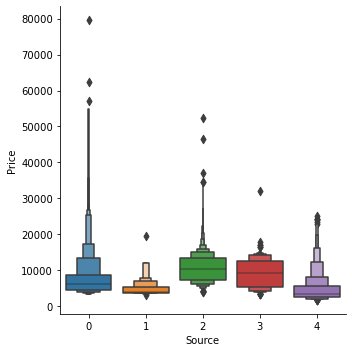

In [88]:
plt.figure(figsize=(12,12))
sns.catplot(y="Price",x="Source",data=df.sort_values("Price",ascending=False),kind="boxen");


<Figure size 864x864 with 0 Axes>

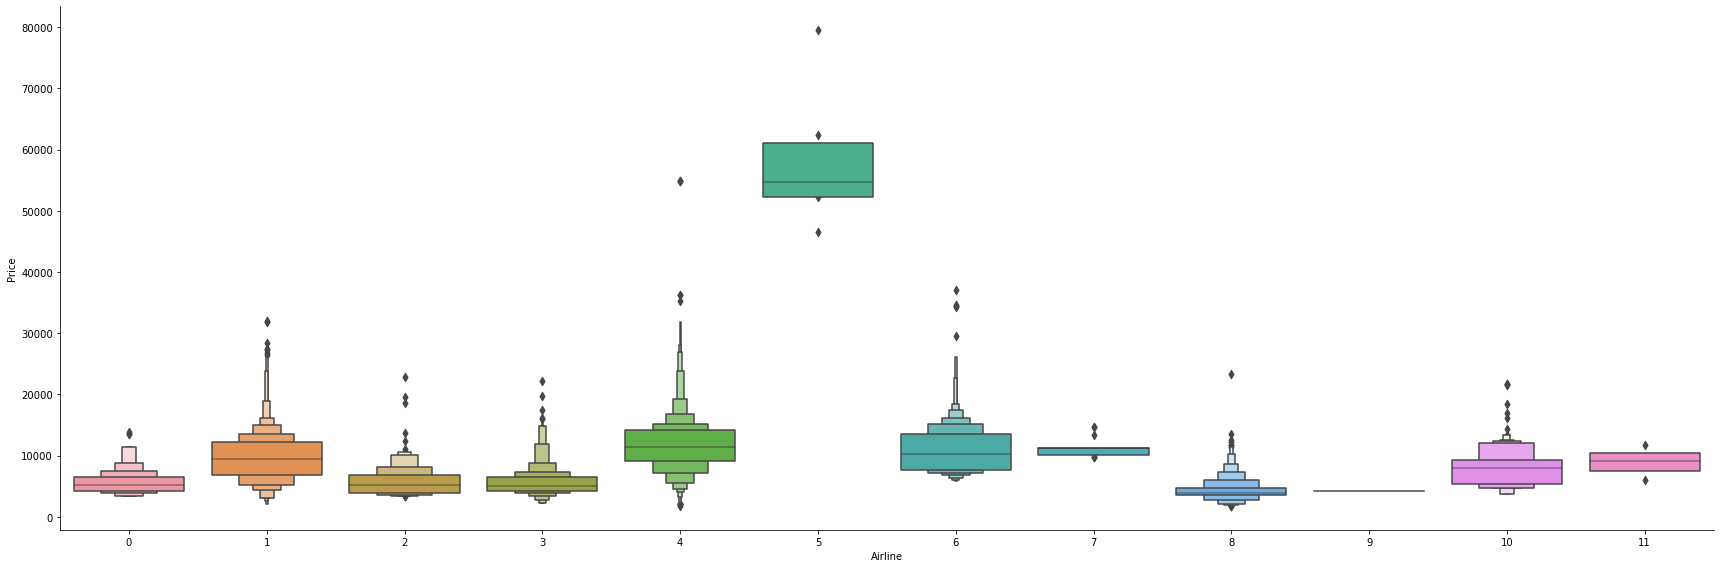

In [90]:
plt.figure(figsize=(12,12))
sns.catplot(y="Price",x="Airline",data=df.sort_values("Price",ascending=False),
            kind="boxen",height=8,aspect=3);


In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [93]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)


In [94]:
from sklearn.linear_model import LinearRegression


In [95]:
lr_model = LinearRegression()


In [96]:
lr_model.fit(scaled_X_train, y_train)


LinearRegression()

In [97]:
lr_model.coef_


array([ 1.39772925e+03,  9.28182158e+02, -4.82535999e+02, -3.20492740e+02,
        2.63897914e+13, -5.44664933e+01,  3.93038749e+01,  6.40441520e+01,
       -4.78036499e+01,  1.04044782e+02,  4.75494376e+02, -1.42585790e+01,
        3.09619224e+01,  2.19117050e+03,  8.66160359e+02,  9.59473923e+02,
        1.28299147e+02,  1.57509628e+01, -2.93052513e+01,  3.35298097e+02,
        1.12180038e+01, -3.94529914e+14, -1.31463109e+15, -2.35369414e+15,
       -6.00647409e+14, -1.31463109e+15, -1.71758824e+15, -7.22645876e+14,
       -5.73723805e+14, -1.48989058e+15])

In [98]:
y_pred = lr_model.predict(scaled_X_test)
y_pred


array([-2.54432680e+13,  1.92750357e+12,  1.92750356e+12, ...,
       -2.54432680e+13, -2.54432680e+13, -6.64849717e+12])

In [99]:
y_pred[1]


1927503566356.5315

In [100]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [101]:
mean_absolute_error(y_test, y_pred)


40153160851103.36

In [102]:
np.sqrt(mean_squared_error(y_test, y_pred))


71349414362578.84

In [103]:
from sklearn.svm import SVR, LinearSVR #linear kernel


In [104]:
mean_absolute_error(y_test, y_pred)


40153160851103.36

In [105]:
from sklearn.model_selection import GridSearchCV


In [106]:
param_grid = {'C': [0.001, 0.01,0.1, 0.5, 1], 'kernel': ['linear', 'rbf', 'poly'], 'gamma' : ['scale', 'auto'], 'degree': [2,3,4], 'epsilon': [0, 0.1,1]}


In [107]:
svr = SVR()


In [ ]:
grid_model = GridSearchCV(svr, param_grid)
